In [3]:
!pip install kaggle

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 92% 150M/163M [00:00<00:00, 381MB/s] 
100% 163M/163M [00:00<00:00, 416MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_90.jpg', 'with_mask_878.jpg', 'with_mask_2918.jpg', 'with_mask_1957.jpg', 'with_mask_1407.jpg']
['with_mask_2579.jpg', 'with_mask_1997.jpg', 'with_mask_2298.jpg', 'with_mask_774.jpg', 'with_mask_190.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2212.jpg', 'without_mask_967.jpg', 'without_mask_3250.jpg', 'without_mask_2200.jpg', 'without_mask_1946.jpg']
['without_mask_1334.jpg', 'without_mask_3634.jpg', 'without_mask_1214.jpg', 'without_mask_3772.jpg', 'without_mask_1185.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [14]:
# create the labels

with_mask_labels=[1]*3725

without_mask_labels = [0]*3828

In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [28]:
labels= without_mask_labels + with_mask_labels

**Displaying the Images**

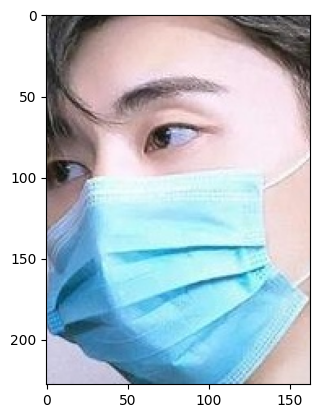

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

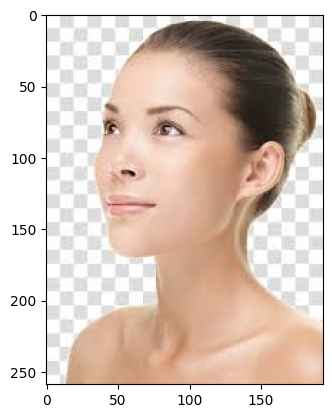

In [18]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [19]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

array([[[ 63,  64, 115],
        [ 65,  67, 118],
        [ 67,  69, 120],
        ...,
        [105, 106, 155],
        [107, 109, 158],
        [101, 105, 153]],

       [[ 57,  61, 112],
        [ 59,  65, 115],
        [ 61,  67, 117],
        ...,
        [108, 110, 161],
        [109, 111, 161],
        [105, 108, 158]],

       [[ 56,  64, 111],
        [ 56,  65, 113],
        [ 55,  66, 114],
        ...,
        [103, 110, 160],
        [106, 112, 163],
        [107, 112, 163]],

       ...,

       [[160, 135, 171],
        [154, 130, 167],
        [146, 125, 164],
        ...,
        [235, 244, 251],
        [235, 244, 251],
        [235, 244, 251]],

       [[164, 138, 173],
        [158, 134, 170],
        [152, 130, 167],
        ...,
        [232, 245, 251],
        [232, 245, 251],
        [232, 245, 251]],

       [[166, 141, 175],
        [161, 137, 173],
        [157, 135, 172],
        ...,
        [233, 245, 251],
        [232, 245, 251],
        [231, 246, 251]]], dtype=uint8)
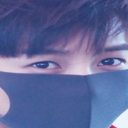

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [29]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [30]:
type(X)

numpy.ndarray

In [31]:
type(Y)

numpy.ndarray

In [32]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [34]:
print(Y)

[0 0 0 ... 1 1 1]


**Train Test Split**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [37]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 254, 255],
        [255, 254, 251],
        [255, 254, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 254, 255],
        [255, 254, 251],
        [255, 254, 253]],

       [[255, 255, 255],
        [254, 254, 254],
        [252, 252, 252],
        ...,
        [255, 255, 253],
        [254, 255, 254],
        [254, 255, 255]]], dtype=uint8)
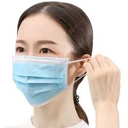

In [38]:
X_train[0]

In [39]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building a Convolutional Neural Networks (CNN)**

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [44]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - acc: 0.6609 - loss: 0.7919 - val_acc: 0.8479 - val_loss: 0.3566
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8853 - loss: 0.3263 - val_acc: 0.8694 - val_loss: 0.2995
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8933 - loss: 0.2844 - val_acc: 0.8926 - val_loss: 0.2633
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9087 - loss: 0.2384 - val_acc: 0.8843 - val_loss: 0.3009
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9237 - loss: 0.2107 - val_acc: 0.8992 - val_loss: 0.2598


**Model Evaluation**

In [45]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9080 - loss: 0.2615
Test Accuracy = 0.9106552004814148


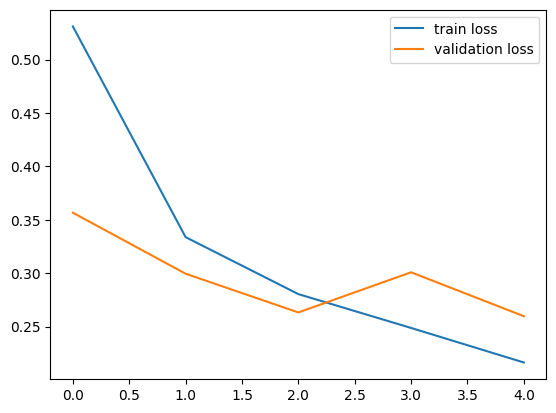

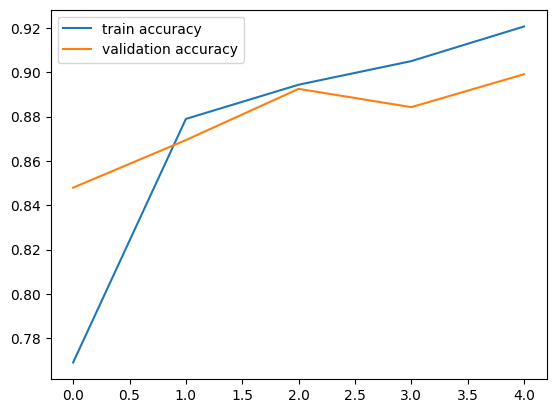

In [46]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1049.jpg


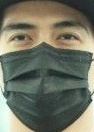

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.41893527 0.60075706]]
1
The person in the image is wearing a mask


In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1001.jpg


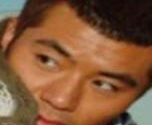

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.8019876 0.4429979]]
0
The person in the image is not wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')